In [1]:
from nilearn.datasets import fetch_abide_pcp
from nilearn import plotting
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch
import scipy 

from data.ABIDEProcessing import get_subjectIDs, fetch_filenames, \
                             get_timeseries, get_subject_connectivity, ROOT_FOLDER

from utils.visualize import visualization
from data.PhenotypicData import PhenoDataProcessing

from src.build import Adj_matrix

In [2]:
EXEC = False        # Turn to True if you download the dataset for the first time

if EXEC : 
    abide_data_dir = './data/' + 'ABIDE_dataset'       
    num_subjects = 871       # Number of subjects for the ABIDE dataset


    abide_data = fetch_abide_pcp(data_dir = abide_data_dir,
                                n_subjects = num_subjects, 
                                pipeline = 'cpac',
                                derivatives = ['rois_ho'], 
                                quality_checked = True, 
                                verbose = 1,
                                band_pass_filtering = True,
                                global_signal_regression=False)

In [3]:
# Get the subjects IDs
subjectIDs = get_subjectIDs()
# Get the filename associated to each subject
fileNames = fetch_filenames(subject_IDs = subjectIDs)

## Get the time series 
time_series = get_timeseries(subjectIDs, fileNames)

Loading time series: 100%|██████████| 871/871 [00:17<00:00, 49.04it/s]


In [4]:
## Build the connectivity matrix for each subject
for i in tqdm(range(len(subjectIDs)), total = len(subjectIDs), desc = "Saving the connectivity matrices"):
    _ = get_subject_connectivity(time_series[i], subjectID = subjectIDs[i]) 

Saving the connectivity matrices: 100%|██████████| 871/871 [00:09<00:00, 88.77it/s] 


$$ \textbf{Visualization of the Time Series and Connectivity Matrix} $$ 

We define
$Sim(S_{v}, S_{w})$ as the correlation distance between the subjects’ rs-fMRI connectivity networks after feature selection, as a separation between ASD and controls
can be observed within certain sites

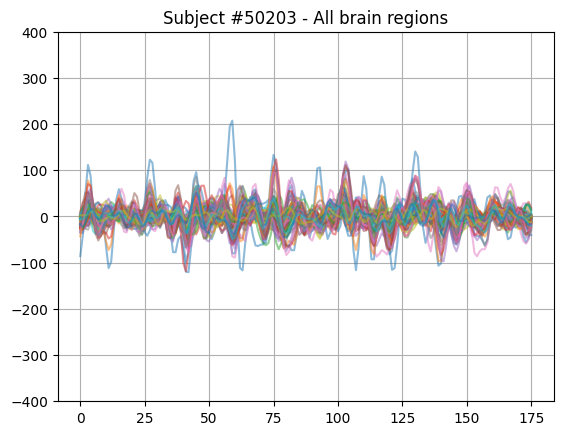

In [5]:
## Setup the visualization class
vis = visualization(subjectIDs = subjectIDs, time_series = time_series, root_folder = ROOT_FOLDER)

# Plot the time series for one subject
vis.plot_ts(idx = 120)

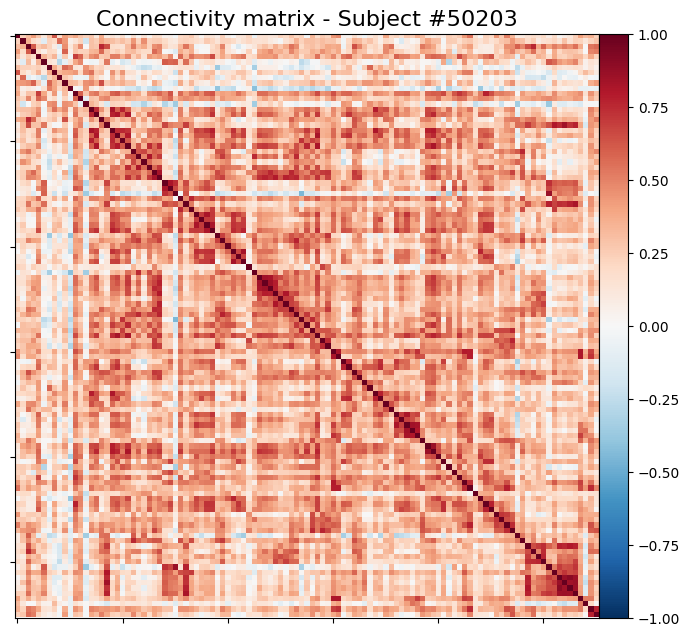

In [6]:
# Visualize the connectivity matrix for one subject
vis.plot_connectivity_matrix(idx = 120)

$$ \textbf{Phenotypic data} $$ 

In [7]:
pdp = PhenoDataProcessing(root_folder = ROOT_FOLDER)

## Extract the phenotypic Dataframe associated to the 871 studied patients
df = pdp.extract_subjects(subjectIDs = subjectIDs)

print(f"The size of the phenotypic DataFrame is {df.shape}")

## First visualization of the DataFrame
df.head()

The size of the phenotypic DataFrame is (871, 106)


Unnamed: 0.1  Unnamed: 0  SUB_ID  X  subject SITE_ID       FILE_ID  \
1             1           2   50003  2    50003    PITT  Pitt_0050003   
2             2           3   50004  3    50004    PITT  Pitt_0050004   
3             3           4   50005  4    50005    PITT  Pitt_0050005   
4             4           5   50006  5    50006    PITT  Pitt_0050006   
5             5           6   50007  6    50007    PITT  Pitt_0050007   

   DX_GROUP  DSM_IV_TR  AGE_AT_SCAN  ...  qc_notes_rater_1 qc_anat_rater_2  \
1         1          1        24.45  ...               NaN              OK   
2         1          1        19.09  ...               NaN              OK   
3         1          1        13.73  ...               NaN              OK   
4         1          1        13.37  ...               NaN              OK   
5         1          1        17.78  ...               NaN              OK   

   qc_anat_notes_rater_2  qc_func_rater_2       qc_func_notes_rater_2  \
1                    NaN               OK                         NaN   
2                    NaN               OK                         NaN   
3                    NaN            maybe      ic-parietal-cerebellum   
4                    NaN            maybe          ic-parietal slight   
5                    NaN            maybe  ic-cerebellum_temporal_lob   

   qc_anat_rater_3 qc_anat_notes_rater_3 qc_func_rater_3  \
1               OK                   NaN              OK   
2               OK                   NaN              OK   
3               OK                   NaN              OK   
4               OK                   NaN              OK   
5               OK                   NaN              OK   

  qc_func_notes_rater_3  SUB_IN_SMP  
1                   NaN           1  
2                   NaN           1  
3                   NaN           0  
4                   NaN           1  
5                   NaN           1  

[5 rows x 106 columns]

$$ \textbf{Adjacency matrices} $$

In [8]:
# same weight as in the original paper
adj = Adj_matrix(subjectIDs = subjectIDs, root_folder = ROOT_FOLDER, sort_var = ['SITE_ID', 'SEX'])

In [9]:
# without add phenotypic information (just the Sim measure)
adj2 = Adj_matrix(subjectIDs = subjectIDs, root_folder = ROOT_FOLDER, sort_var = ['SITE_ID', 'SEX'], phenotypic_var=None)

In [10]:
# as presented in the original paper
adjacency_matrix = adj.compute_adjacency_matrix(nb_features = 100)

Computing the score matrix on the phenotypic features ...


Building Score matrix: 100%|██████████| 871/871 [07:12<00:00,  2.01it/s]


DONE
Computing the correlation matrix on the similarities ...


Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:04<00:00, 178.04it/s]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:73: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:132: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  selector = selector.fit(X, Y.ravel())


Fitting estimator with 6105 features.
Fitting estimator with 6005 features.
Fitting estimator with 5905 features.
Fitting estimator with 5805 features.
Fitting estimator with 5705 features.
Fitting estimator with 5605 features.
Fitting estimator with 5505 features.
Fitting estimator with 5405 features.
Fitting estimator with 5305 features.
Fitting estimator with 5205 features.
Fitting estimator with 5105 features.
Fitting estimator with 5005 features.
Fitting estimator with 4905 features.
Fitting estimator with 4805 features.
Fitting estimator with 4705 features.
Fitting estimator with 4605 features.
Fitting estimator with 4505 features.
Fitting estimator with 4405 features.
Fitting estimator with 4305 features.
Fitting estimator with 4205 features.
Fitting estimator with 4105 features.
Fitting estimator with 4005 features.
Fitting estimator with 3905 features.
Fitting estimator with 3805 features.
Fitting estimator with 3705 features.
Fitting estimator with 3605 features.
Fitting esti

In [11]:
# same but weights without phenotypic information
adjacency_matrix2 = adj2.compute_adjacency_matrix(nb_features = 100)

Computing the score matrix on the phenotypic features ...


Building Score matrix: 100%|██████████| 871/871 [04:54<00:00,  2.95it/s]


DONE
Computing the correlation matrix on the similarities ...


Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:04<00:00, 207.68it/s]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:73: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:132: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  selector = selector.fit(X, Y.ravel())


Fitting estimator with 6105 features.
Fitting estimator with 6005 features.
Fitting estimator with 5905 features.
Fitting estimator with 5805 features.
Fitting estimator with 5705 features.
Fitting estimator with 5605 features.
Fitting estimator with 5505 features.
Fitting estimator with 5405 features.
Fitting estimator with 5305 features.
Fitting estimator with 5205 features.
Fitting estimator with 5105 features.
Fitting estimator with 5005 features.
Fitting estimator with 4905 features.
Fitting estimator with 4805 features.
Fitting estimator with 4705 features.
Fitting estimator with 4605 features.
Fitting estimator with 4505 features.
Fitting estimator with 4405 features.
Fitting estimator with 4305 features.
Fitting estimator with 4205 features.
Fitting estimator with 4105 features.
Fitting estimator with 4005 features.
Fitting estimator with 3905 features.
Fitting estimator with 3805 features.
Fitting estimator with 3705 features.
Fitting estimator with 3605 features.
Fitting esti

In [12]:
# without phenotypic information and with pca method
adjacency_matrix2_pca = adj2.compute_adjacency_matrix(nb_features = 100, method="pca")

Computing the score matrix on the phenotypic features ...


Building Score matrix: 100%|██████████| 871/871 [05:08<00:00,  2.82it/s]


DONE
Computing the correlation matrix on the similarities ...


Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:05<00:00, 164.39it/s]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:73: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]


Explained variance ratio for 100 components: [0.3447057  0.02580002 0.02444557 0.01798552 0.01513665 0.0134282
 0.01093323 0.00977678 0.0096092  0.00874879 0.00822845 0.00748293
 0.00740887 0.00679368 0.00646968 0.0062276  0.0059466  0.00568299
 0.00551493 0.00542903 0.00520866 0.00497852 0.00474442 0.0045937
 0.00451504 0.00430111 0.0042154  0.00418596 0.00405183 0.00396871
 0.00388498 0.0036389  0.00363246 0.00356519 0.00350052 0.00336569
 0.00334761 0.00332976 0.00315979 0.00310578 0.00300519 0.00298593
 0.0028731  0.00280165 0.0027749  0.0027052  0.00267727 0.00264302
 0.00257601 0.00254377 0.00243655 0.00239629 0.0023724  0.00235044
 0.00234164 0.00227952 0.0022678  0.00221593 0.00217414 0.00216015
 0.00212891 0.0020836  0.0020651  0.00201719 0.00199425 0.00197565
 0.0019404  0.00192887 0.00190119 0.00188861 0.00187472 0.00185399
 0.00183737 0.00180327 0.0017716  0.00174599 0.00171709 0.00169134
 0.00165458 0.00165167 0.00162385 0.00161806 0.00160778 0.00156845
 0.00154416 0.00152

In [13]:
# with phenotypic information and pca method
adjacency_matrix_pca = adj.compute_adjacency_matrix(nb_features = 100, method="pca")

Computing the score matrix on the phenotypic features ...


Building Score matrix:   0%|          | 0/871 [00:00<?, ?it/s]

Building Score matrix: 100%|██████████| 871/871 [07:20<00:00,  1.98it/s]


DONE
Computing the correlation matrix on the similarities ...


Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:03<00:00, 252.87it/s]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:73: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]


Explained variance ratio for 100 components: [0.3447057  0.02580002 0.02444557 0.01798552 0.01513665 0.0134282
 0.01093323 0.00977678 0.0096092  0.00874879 0.00822845 0.00748293
 0.00740887 0.00679368 0.00646968 0.0062276  0.0059466  0.00568299
 0.00551493 0.00542903 0.00520866 0.00497852 0.00474441 0.0045937
 0.00451504 0.00430109 0.00421542 0.00418596 0.00405183 0.00396871
 0.00388499 0.00363879 0.00363264 0.00356514 0.00350064 0.00336552
 0.00334739 0.00332973 0.00315978 0.00310579 0.0030049  0.00298586
 0.00287297 0.00280252 0.00277437 0.00270583 0.00267612 0.00264257
 0.0025767  0.00254349 0.0024335  0.00239753 0.00237378 0.00235022
 0.00233539 0.0022816  0.00226544 0.00221022 0.00217421 0.00216312
 0.00213063 0.00207448 0.00206169 0.00202135 0.001994   0.00197591
 0.00194369 0.00192787 0.00189522 0.0018826  0.00186498 0.00186022
 0.00184133 0.00178904 0.00177601 0.00175433 0.00171708 0.00169261
 0.00167084 0.00165706 0.001642   0.00161061 0.00159915 0.00157682
 0.00157458 0.00155

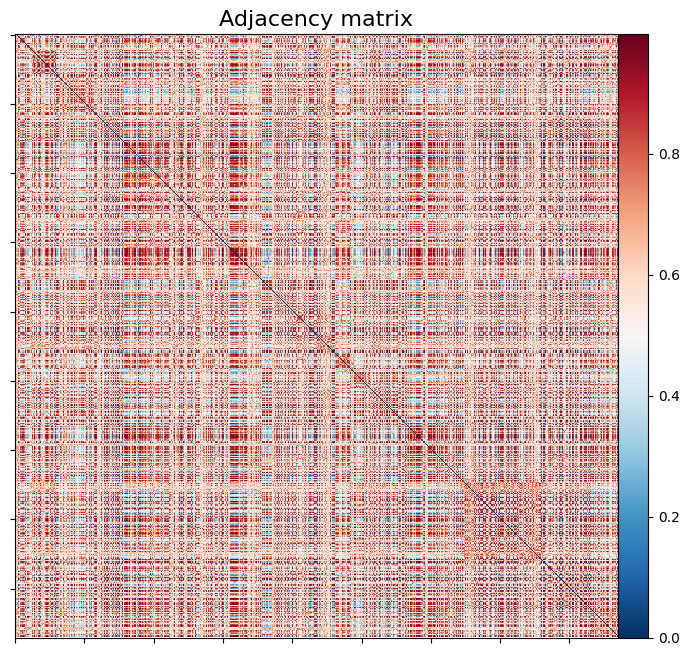

In [14]:
plotting.plot_matrix(adjacency_matrix2_pca,
                     title = "Adjacency matrix", 
                     figure = (7,7))
plt.show()

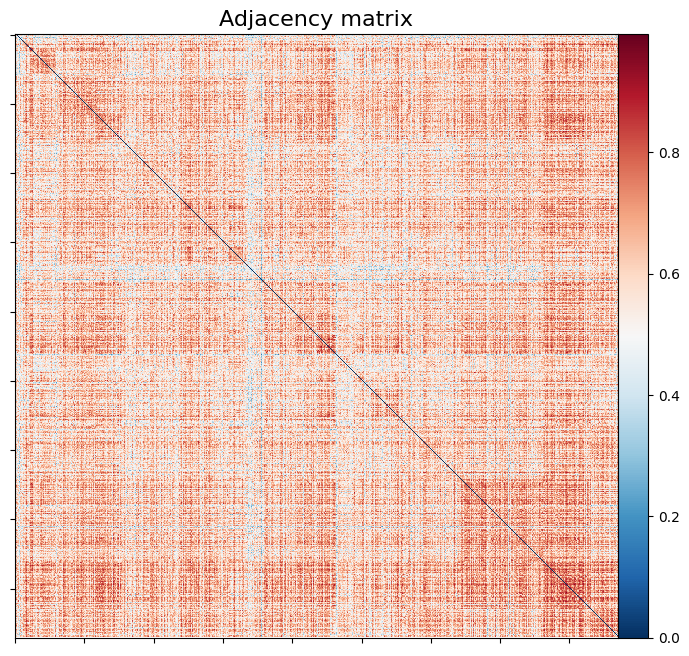

In [15]:
plotting.plot_matrix(adjacency_matrix2,
                     title = "Adjacency matrix", 
                     figure = (7,7))
plt.show()

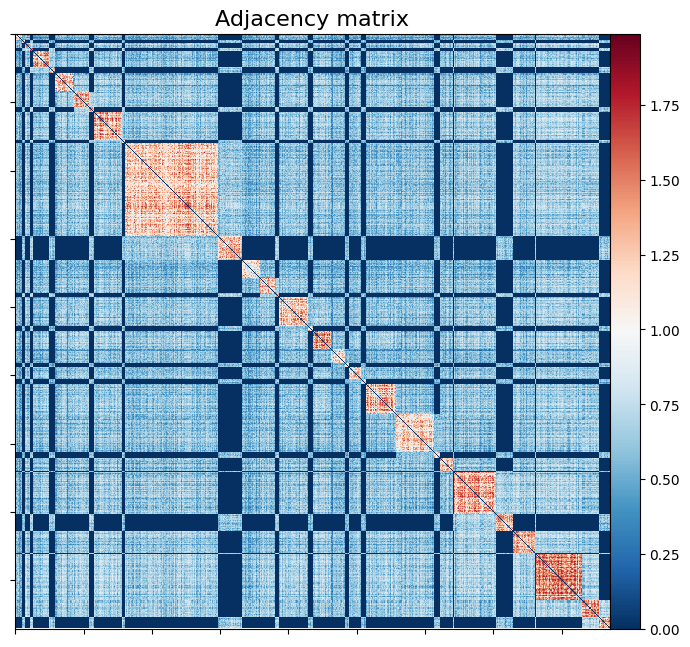

In [16]:
plotting.plot_matrix(adjacency_matrix,
                     title = "Adjacency matrix", 
                     figure = (7,7))
plt.show()

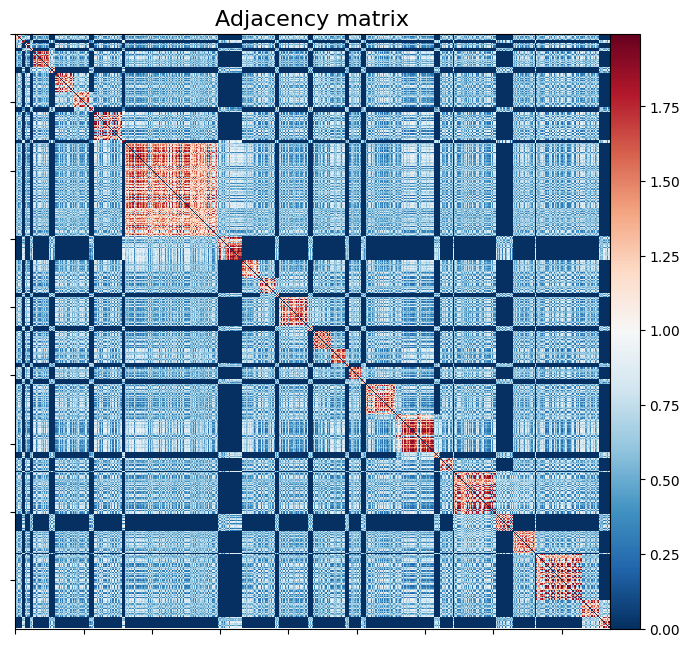

In [17]:
plotting.plot_matrix(adjacency_matrix_pca,
                     title = "Adjacency matrix", 
                     figure = (7,7))
plt.show()

La proportion de patients atteints d'autisme est de 0.4626865671641791
La proportion de patients sains est de 0.5373134328358209


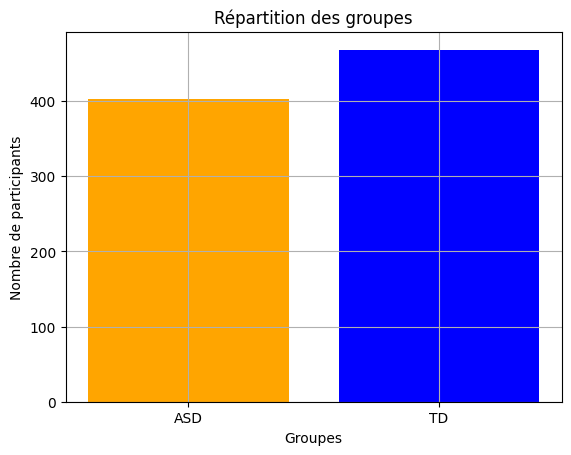

In [18]:
## Comparaison de la répartition des classes (sujets sain et malades)
# DX_GROUP = 1 : Patient atteint d'autisme
# DX_GROUP = 2 : Patient sain
count = df['DX_GROUP'].value_counts()

print(f"La proportion de patients atteints d'autisme est de {count[1]/sum(count)}")
print(f"La proportion de patients sains est de {count[2]/sum(count)}")

plt.bar(count.index, count.values, color=['blue', 'orange'], tick_label=['TD', 'ASD'])
plt.xlabel('Groupes')
plt.ylabel('Nombre de participants')
plt.grid()
plt.title('Répartition des groupes')
plt.show()

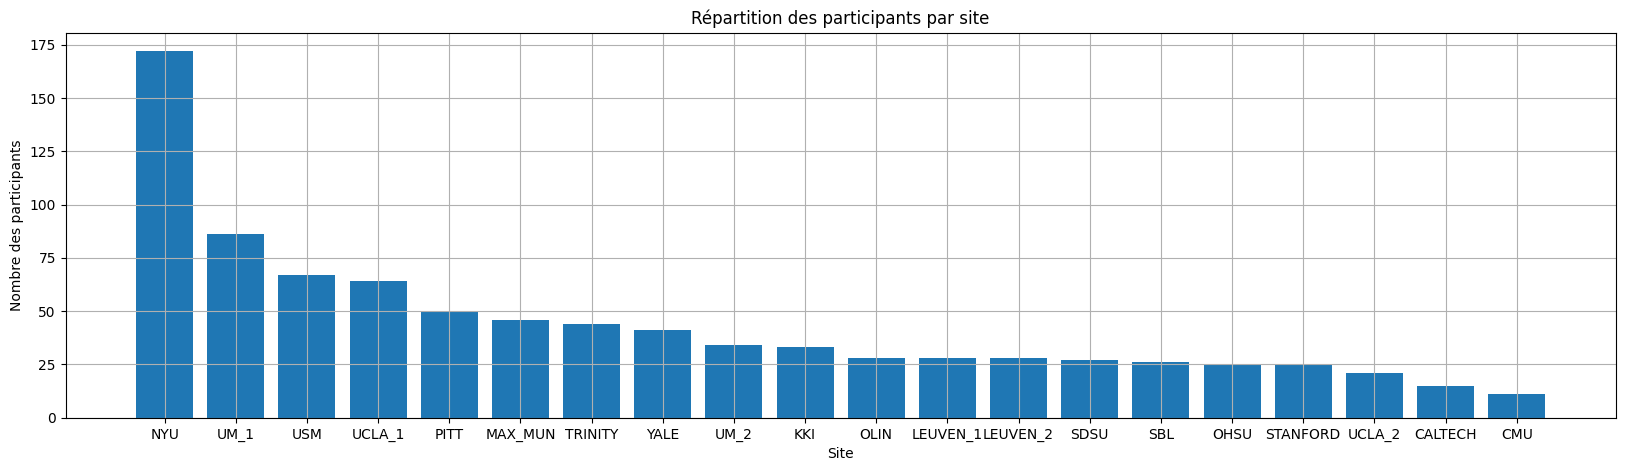

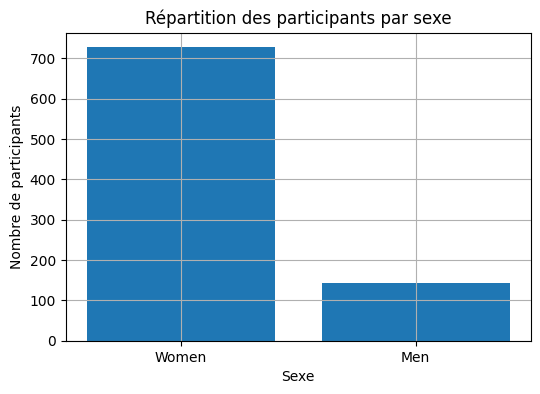

In [19]:
## Réparition des sexes et des sites
count_sex = df['SEX'].value_counts()
count_site = df['SITE_ID'].value_counts()

plt.figure(figsize=(20,5))
plt.bar(count_site.index, count_site.values)
plt.xlabel('Site')
plt.ylabel('Nombre des participants')
plt.grid()
plt.title('Répartition des participants par site')
plt.show()

plt.figure(figsize = (6, 4))
plt.bar(count_sex.index, count_sex.values, tick_label = ['Women', 'Men'])
plt.xlabel('Sexe')
plt.ylabel('Nombre de participants')
plt.grid()
plt.title('Répartition des participants par sexe')
plt.show()

$$ \textbf{Création des ensembles d'entrainement, validation et test} $$ 

In [20]:
from src.gcn import ChebGCN
from src.config import general_settings
from src.pipeline import DataPipeline, TrainTestPipeline

In [28]:
import torch
import torch.nn as nn
import numpy as np
from utils.preprocess import preprocess_features
from tqdm import tqdm
import torch.nn.functional as func
from torchmetrics import Accuracy
import os 
import random
from sklearn.model_selection import KFold

In [ ]:
class DataPipeline :
    def __init__(self, args,
                 nb_patients = 871):
        super(DataPipeline).__init__()

        self.nb_patients = nb_patients
        self.args = args

    def get_kfolds(self, n_splits=10, shuffle=True, seed=42):
        idx = np.arange(self.nb_patients)
        kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=seed)
        return kf.split(idx)


    def get_set_idx(self, train_ratio = 0.80, val_ratio = 0.10, test_ratio = 0.10, shuffle = True, seed = 42):

        assert np.isclose(train_ratio + val_ratio + test_ratio, 1.0), "The ratios should sum to 1."

        # Generate all the indexes
        idx = np.arange(self.nb_patients)

        if shuffle:
            if seed is not None:
                np.random.seed(seed)
            np.random.shuffle(idx)

        # Compute the size of training and validation sets
        train_size = int(train_ratio * self.nb_patients)
        val_size = int(val_ratio * self.nb_patients)

        # Get the indexes associated to each set
        train_idx = idx[:train_size]
        val_idx = idx[train_size:train_size + val_size]
        test_idx = idx[train_size + val_size:]

        return train_idx, val_idx, test_idx
    
    def get_labels(self, set):
        # Retrieve the labels of the dataset and put them in {0, 1}
        labels = torch.tensor(set['DX_GROUP'].values, dtype = torch.float32) - 1.0
        return labels
    
    def build_data_dict(self, df, feature_mat, adjacency_matrix):
        train_idx, val_idx, test_idx = self.get_set_idx()

        data_dict = {
            "train_idx" : train_idx,
            "val_idx" : val_idx,
            "test_idx" : test_idx,
            "labels" : self.get_labels(df),
            "inputs" : {
                "raw_input" : torch.tensor(feature_mat, dtype = torch.float32),
                "raw_normalized_input" : preprocess_features(feature_mat)
            },
            "adjacency_matrix" : torch.tensor(adjacency_matrix, dtype = torch.float32)
        }

        return data_dict


class TrainTestPipeline :

    def __init__(self, args, data_dict, model, modelName, ROOT_FOLDER, f_vect_type="raw_input"):
        super(TrainTestPipeline).__init__()

        # Setup the Pipeline device
        self.device = "cuda" if args.use_cuda else "cpu"

        self.args = args
        self.data_dict = data_dict
        self.f_vect_type = f_vect_type

        # Retrieve the number of patients & features
        self.N, self.nb_features = self.data_dict["inputs"][f_vect_type].size()

        # Setup the model
        self.model = model.to(self.device)

        # Setup the path to save the model
        self.modelDirectory = os.path.join(ROOT_FOLDER, 'models')
        if not os.path.exists(self.modelDirectory):
            os.makedirs(self.modelDirectory)

        self.modelFileName = os.path.join(self.modelDirectory, modelName) + '_best_model.pt'

        # Select the inputs
        self.f_vect_type = f_vect_type

    def get_set_matrix(self, set_id):
        # Initialize a zero matrix of size [N, nb_features]
        mat = torch.zeros([self.N, self.nb_features], dtype=torch.float32).to(self.device)

        # This matrix has the feature vector at rows in set_id, 0 otherwise
        mat[set_id] = self.data_dict["inputs"][self.f_vect_type][set_id]

        return mat

    def get_extra_features(self, set_id):
        # Extract the extra features for the current set (train, val, or test)
        if set_id == "train":
            return self.data_dict["extra_features_train"].to(self.device)
        elif set_id == "val":
            return self.data_dict["extra_features_val"].to(self.device)
        else:
            return self.data_dict["extra_features_test"].to(self.device)

    def NNTrain(self):
        # Get the matrix associated to training and validation set
        train_idx = self.data_dict["train_idx"]
        self.train_set = self.get_set_matrix(set_id=train_idx)
        self.trainLOSS = torch.zeros([self.args.n_epoch])
        self.trainAccuracy = torch.zeros([self.args.n_epoch])

        # Validation set
        val_idx = self.data_dict["val_idx"]
        self.val_set = self.get_set_matrix(set_id=val_idx)
        self.valLoss = torch.zeros([self.args.n_epoch])
        self.valAccuracy = torch.zeros([self.args.n_epoch])

        # Best Accuracy
        best_accuracy = -1.0

        # Use Adam as an optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.args.lr, weight_decay=self.args.wd)
        # Use BCELoss as loss function
        self.loss_fn = nn.BCEWithLogitsLoss()

        for epoch in range(self.args.n_epoch):
            #######################################
            ######### ---- TRAINING ---- ##########
            #######################################
            self.model.train()
            self.optimizer.zero_grad()

            # Forward the data through the neural network
            train_extra_features = self.get_extra_features("train")
            train_logits = self.model(self.train_set, train_extra_features)  # Pass extra features to the model

            # Compute the loss then backpropagate
            loss = self.loss_fn(train_logits[train_idx], self.data_dict["labels"][train_idx])
            loss.backward()

            # Save the training loss
            self.trainLOSS[epoch] = loss.item()

            # Update the network parameters
            self.optimizer.step()

            # Compute and save the training accuracy
            self.trainAccuracy[epoch] = self.compute_accuracy(train_logits, train_idx)

            #######################################
            ######## ---- EVALUATION ---- #########
            #######################################
            self.model.eval()

            with torch.no_grad():
                val_extra_features = self.get_extra_features("val")
                val_logits = self.model(self.val_set, val_extra_features)  # Pass extra features to the model

                val_loss = self.loss_fn(val_logits[val_idx], self.data_dict["labels"][val_idx])
                self.valLoss[epoch] = val_loss

                self.valAccuracy[epoch] = self.compute_accuracy(val_logits, val_idx)

            if self.valAccuracy[epoch] > best_accuracy:
                torch.save(self.model, self.modelFileName)
                best_accuracy = self.valAccuracy[epoch]

            print(f"Epoch {epoch} | Train Loss: {self.trainLOSS[epoch]} | Validation Loss: {self.valLoss[epoch]} | Validation Accuracy: {self.valAccuracy[epoch]}")

        return [self.trainLOSS, self.trainAccuracy, self.valLoss, self.valAccuracy]



    def NNTrain(self):

        ## Get the matrix associated to training and validation set
        ## + Setup the metrics tensors  :

        # Train set
        train_idx = self.data_dict["train_idx"]
        self.train_set = self.get_set_matrix(set_id = train_idx)
        self.trainLOSS = torch.zeros([self.args.n_epoch])
        self.trainAccuracy = torch.zeros([self.args.n_epoch])
    
        # Validation set
        val_idx = self.data_dict["val_idx"]
        self.val_set = self.get_set_matrix(set_id = val_idx)
        self.valLoss = torch.zeros([self.args.n_epoch])
        self.valAccuracy = torch.zeros([self.args.n_epoch])

        # Best Accuracy
        best_accuracy = -1.0

        # Use Adam as an optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr = self.args.lr, weight_decay = self.args.wd)
        # Use BCELoss as loss function
        self.loss_fn = nn.BCEWithLogitsLoss()

        for epoch in range(self.args.n_epoch):

            #######################################
            ######### ---- TRAINING ---- ##########
            ####################################### 
            self.model.train()
            # Set the gradients to zero
            self.optimizer.zero_grad()

            # Forward the data through the neural network
            train_logits = torch.squeeze(self.model(self.train_set))

            # Compute the loss then backpropagate
            loss = self.loss_fn(train_logits[train_idx], self.data_dict["labels"][train_idx])
            loss.backward()

            # Save the training loss
            self.trainLOSS[epoch] = loss.item()

            # Update the network parameters 
            self.optimizer.step()

            # Compute and save the training accuracy
            self.trainAccuracy[epoch] = self.compute_accuracy(train_logits, train_idx)

            #######################################
            ######## ---- EVALUATION ---- #########
            ####################################### 
            self.model.eval()

            with torch.no_grad():
                # Forward the validation data through the neural network
                val_logits = torch.squeeze(self.model(self.val_set))

                # Compute and save the loss on the validation set
                val_loss = self.loss_fn(val_logits[val_idx], self.data_dict["labels"][val_idx])
                self.valLoss[epoch] =  val_loss
                
                # Compute and save the accuracy on the validation set
                self.valAccuracy[epoch] = self.compute_accuracy(val_logits, val_idx)

            if (self.valAccuracy[epoch] > best_accuracy):
                torch.save(self.model, self.modelFileName)
                best_accuracy = self.valAccuracy[epoch]
            
            print(f"Epoch {epoch} | Train Loss : {self.trainLOSS[epoch]} | Validation Loss : {self.valLoss[epoch]} | Validation accuracy : {self.valAccuracy[epoch]}")


        return [self.trainLOSS, self.trainAccuracy, self.valLoss, self.valAccuracy] 
    
    def NNTrainMiniBatch(self, batch_size):
        ## Get the matrix associated to training and validation set
        ## + Setup the metrics tensors  :

        # Train set
        train_idx = self.data_dict["train_idx"]
        self.trainLOSS = torch.zeros([self.args.n_epoch])
        self.trainAccuracy = torch.zeros([self.args.n_epoch])

        # Validation set
        val_idx = self.data_dict["val_idx"]
        self.val_set = self.get_set_matrix(set_id=val_idx)
        self.valLoss = torch.zeros([self.args.n_epoch])
        self.valAccuracy = torch.zeros([self.args.n_epoch])

        # Best Accuracy
        best_accuracy = -1.0

        # Use Adam as an optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.args.lr, weight_decay=self.args.wd)
        # Use BCELoss as loss function
        self.loss_fn = nn.BCEWithLogitsLoss()

        for epoch in range(self.args.n_epoch):

            #######################################
            ######### ---- TRAINING ---- ##########
            #######################################
            self.model.train()
            # Set the gradients to zero
            self.optimizer.zero_grad()

            # Select a set of indexes in the train set
            epoch_indexes = random.sample(sorted(train_idx), batch_size)
            # Get the matrix associated to this set of indexes
            self.train_set = self.get_set_matrix(set_id=epoch_indexes)
            extra_features_batch = self.data_dict["extra_features"][epoch_indexes]  # Retrieve extra features for this batch
            
            # Concatenate the extra features with the existing input features
            input_batch = torch.cat((self.train_set, extra_features_batch), dim=1)  # Concatenate along feature dimension

            # Forward the data through the neural network
            train_logits = torch.squeeze(self.model(input_batch))

            # Compute the loss then backpropagate
            loss = self.loss_fn(train_logits[epoch_indexes], self.data_dict["labels"][epoch_indexes])
            loss.backward()

            # Save the training loss
            self.trainLOSS[epoch] = loss.item()

            # Update the network parameters
            self.optimizer.step()

            # Compute and save the training accuracy
            self.trainAccuracy[epoch] = self.compute_accuracy(train_logits, epoch_indexes)

            #######################################
            ######## ---- EVALUATION ---- #########
            #######################################
            self.model.eval()

            with torch.no_grad():
                # Forward the validation data through the neural network
                val_logits = torch.squeeze(self.model(self.val_set))

                # Compute and save the loss on the validation set
                val_loss = self.loss_fn(val_logits[val_idx], self.data_dict["labels"][val_idx])
                self.valLoss[epoch] = val_loss

                # Compute and save the accuracy on the validation set
                self.valAccuracy[epoch] = self.compute_accuracy(val_logits, val_idx)

            if self.valAccuracy[epoch] > best_accuracy:
                torch.save(self.model, self.modelFileName)
                best_accuracy = self.valAccuracy[epoch]

            print(f"Epoch {epoch} | Train Loss : {self.trainLOSS[epoch]} | Validation Loss : {self.valLoss[epoch]} | Validation Accuracy : {self.valAccuracy[epoch]}")

        return [self.trainLOSS, self.trainAccuracy, self.valLoss, self.valAccuracy]

    def NNTrainMiniBatch(self, batch_size):
       ## Get the matrix associated to training and validation set
        ## + Setup the metrics tensors  :

        # Train set
        train_idx = self.data_dict["train_idx"]
        self.trainLOSS = torch.zeros([self.args.n_epoch])
        self.trainAccuracy = torch.zeros([self.args.n_epoch])
    
        # Validation set
        val_idx = self.data_dict["val_idx"]
        self.val_set = self.get_set_matrix(set_id = val_idx)
        self.valLoss = torch.zeros([self.args.n_epoch])
        self.valAccuracy = torch.zeros([self.args.n_epoch])

        # Best Accuracy
        best_accuracy = -1.0

        # Use Adam as an optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr = self.args.lr, weight_decay = self.args.wd)
        # Use BCELoss as loss function
        self.loss_fn = nn.BCEWithLogitsLoss()

        for epoch in range(self.args.n_epoch):

            #######################################
            ######### ---- TRAINING ---- ##########
            ####################################### 
            self.model.train()
            # Set the gradients to zero
            self.optimizer.zero_grad()

            # Select a set of indexes in the train set
            epoch_indexes = random.sample(sorted(train_idx), batch_size)
            # Get the matrix associated to this set of indexes
            self.train_set = self.get_set_matrix(set_id = epoch_indexes)

            # Forward the data through the neural network
            train_logits = torch.squeeze(self.model(self.train_set))

            # Compute the loss then backpropagate
            loss = self.loss_fn(train_logits[epoch_indexes], self.data_dict["labels"][epoch_indexes])
            loss.backward()

            # Save the training loss
            self.trainLOSS[epoch] = loss.item()

            # Update the network parameters 
            self.optimizer.step()

            # Compute and save the training accuracy
            self.trainAccuracy[epoch] = self.compute_accuracy(train_logits, epoch_indexes)

            #######################################
            ######## ---- EVALUATION ---- #########
            ####################################### 
            self.model.eval()

            with torch.no_grad():
                # Forward the validation data through the neural network
                val_logits = torch.squeeze(self.model(self.val_set))

                # Compute and save the loss on the validation set
                val_loss = self.loss_fn(val_logits[val_idx], self.data_dict["labels"][val_idx])
                self.valLoss[epoch] =  val_loss
                
                # Compute and save the accuracy on the validation set
                self.valAccuracy[epoch] = self.compute_accuracy(val_logits, val_idx)

            if (self.valAccuracy[epoch] > best_accuracy):
                torch.save(self.model, self.modelFileName)
                best_accuracy = self.valAccuracy[epoch]
            
            print(f"Epoch {epoch} | Train Loss : {self.trainLOSS[epoch]} | Validation Loss : {self.valLoss[epoch]} | Validation accuracy : {self.valAccuracy[epoch]}")


        return [self.trainLOSS, self.trainAccuracy, self.valLoss, self.valAccuracy]
    

    def NNTrainMiniBatchKFold(self, data_pipeline, batch_size, n_splits=10):
        kfold_accuracies = []
        kfolds = data_pipeline.get_kfolds(n_splits=n_splits)

        for fold, (train_idx, val_idx) in enumerate(kfolds):
            print(f"Fold {fold + 1}/{n_splits}")
            
            # Metrics for this fold
            self.trainLOSS = torch.zeros([self.args.n_epoch])
            self.trainAccuracy = torch.zeros([self.args.n_epoch])
            self.valLoss = torch.zeros([self.args.n_epoch])
            self.valAccuracy = torch.zeros([self.args.n_epoch])

            # Reset model weights for each fold
            self.model.apply(self.reset_weights)

            # Use Adam as an optimizer
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.args.lr, weight_decay=self.args.wd)
            # Use BCELoss as loss function
            self.loss_fn = nn.BCEWithLogitsLoss()

            # Training loop for epochs
            for epoch in range(self.args.n_epoch):
                #######################################
                ######### ---- TRAINING ---- ##########
                #######################################
                self.model.train()

                # Shuffle training indices for mini-batch sampling
                train_idx_shuffled = random.sample(sorted(train_idx), len(train_idx))
                for i in range(0, len(train_idx_shuffled), batch_size):
                    batch_idx = train_idx_shuffled[i:i + batch_size]

                    # Get the matrix for the current batch
                    self.train_set = self.get_set_matrix(set_id=batch_idx)

                    # Set the gradients to zero
                    self.optimizer.zero_grad()

                    # Forward pass
                    train_logits = torch.squeeze(self.model(self.train_set))

                    # Compute loss and backpropagate
                    loss = self.loss_fn(train_logits[batch_idx], self.data_dict["labels"][batch_idx])
                    loss.backward()

                    # Update parameters
                    self.optimizer.step()

                    # Accumulate loss for the epoch
                    self.trainLOSS[epoch] += loss.item() / len(train_idx_shuffled)

                # Compute training accuracy for the epoch
                self.trainAccuracy[epoch] = self.compute_accuracy(train_logits, train_idx)

                #######################################
                ######## ---- EVALUATION ---- #########
                #######################################
                self.model.eval()

                with torch.no_grad():
                    # Get the matrix for the validation set
                    self.val_set = self.get_set_matrix(set_id=val_idx)

                    # Forward pass on validation data
                    val_logits = torch.squeeze(self.model(self.val_set))

                    # Compute validation loss
                    val_loss = self.loss_fn(val_logits[val_idx], self.data_dict["labels"][val_idx])
                    self.valLoss[epoch] = val_loss

                    # Compute validation accuracy
                    self.valAccuracy[epoch] = self.compute_accuracy(val_logits, val_idx)

                print(f"Epoch {epoch} | Train Loss: {self.trainLOSS[epoch]} | Validation Loss: {self.valLoss[epoch]} | Validation Accuracy: {self.valAccuracy[epoch]}")

            # Save the accuracy of the best validation epoch for this fold
            best_fold_accuracy = max(self.valAccuracy).item()
            kfold_accuracies.append(best_fold_accuracy)
            print(f"Fold {fold + 1} Best Validation Accuracy: {best_fold_accuracy}")

        # Compute the average accuracy across all folds
        mean_accuracy = np.mean(kfold_accuracies)
        print(f"Mean Accuracy over {n_splits} folds: {mean_accuracy}")
        return kfold_accuracies

    def reset_weights(self, m):
        """
        Reset model weights to ensure independence between folds.
        """
        if hasattr(m, 'reset_parameters'):
            m.reset_parameters()

    
    def NNTest(self):
        ## Get the matrix associated to the test set
        self.test_set = self.get_set_matrix(set_id = self.data_dict["test_idx"])

        model = torch.load(self.modelFileName)
        ## Evaluate the model on the test set and compute the accuracy
        model.eval()
        test_logits = torch.squeeze(self.model(self.test_set))
        
        test_accuracy = self.compute_accuracy(test_logits, self.data_dict["test_idx"])

        return test_accuracy


In [ ]:
args = general_settings()
data_pipe = DataPipeline(args)

feature_vector = adj2.get_feature_vectors()
feature_vector_pca = adj2.feature_selection(feature_vector, 100, method="pca")
feature_vector_rfe = adj2.feature_selection(feature_vector, 100, method="rfe")

Retrieving the connectivity matrices: 100%|██████████| 871/871 [00:01<00:00, 552.74it/s]
c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:73: RuntimeWarning: divide by zero encountered in arctanh
  norm_networks = [np.arctanh(mat) for mat in self.all_networks]


Explained variance ratio for 100 components: [0.3447057  0.02580002 0.02444557 0.01798552 0.01513665 0.0134282
 0.01093323 0.00977678 0.0096092  0.00874879 0.00822845 0.00748293
 0.00740887 0.00679368 0.00646968 0.00622759 0.0059466  0.00568299
 0.00551493 0.00542903 0.00520866 0.00497852 0.00474441 0.00459371
 0.00451506 0.00430115 0.00421546 0.00418592 0.00405184 0.00396873
 0.00388506 0.00363887 0.00363268 0.0035651  0.00350072 0.00336557
 0.00334762 0.00332991 0.00315983 0.00310568 0.00300484 0.00298559
 0.00287339 0.00280266 0.0027743  0.00270558 0.00267707 0.00264271
 0.00257589 0.00254283 0.00243634 0.00239735 0.00237111 0.00234868
 0.00234111 0.00228211 0.00226816 0.00221324 0.00217234 0.00216192
 0.00212409 0.00207574 0.00205902 0.00201743 0.00199657 0.00198403
 0.00194779 0.00193475 0.00190094 0.00189274 0.00186426 0.00185596
 0.00184605 0.00179761 0.00177509 0.00176096 0.00171707 0.00169328
 0.00167101 0.00165441 0.00164862 0.00161412 0.0015914  0.00157343
 0.001549   0.0015

c:\Users\maell\MVA-Geometric_Data_Analysis\src\build.py:132: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  selector = selector.fit(X, Y.ravel())


Fitting estimator with 6005 features.
Fitting estimator with 5905 features.
Fitting estimator with 5805 features.
Fitting estimator with 5705 features.
Fitting estimator with 5605 features.
Fitting estimator with 5505 features.
Fitting estimator with 5405 features.
Fitting estimator with 5305 features.
Fitting estimator with 5205 features.
Fitting estimator with 5105 features.
Fitting estimator with 5005 features.
Fitting estimator with 4905 features.
Fitting estimator with 4805 features.
Fitting estimator with 4705 features.
Fitting estimator with 4605 features.
Fitting estimator with 4505 features.
Fitting estimator with 4405 features.
Fitting estimator with 4305 features.
Fitting estimator with 4205 features.
Fitting estimator with 4105 features.
Fitting estimator with 4005 features.
Fitting estimator with 3905 features.
Fitting estimator with 3805 features.
Fitting estimator with 3705 features.
Fitting estimator with 3605 features.
Fitting estimator with 3505 features.
Fitting esti

In [ ]:
input_dim = 100
args.hidden_dim = 20
args.num_layers = 5
args.dropout_rate = 0.3
args.n_epoch = 100

Model RFE, weights without phenotypic information

In [ ]:
data_dict = data_pipe.build_data_dict(df, feature_vector_rfe, adjacency_matrix2)
chebgcn = ChebGCN(args, in_features = input_dim, out_features = 1, adjacency_matrix = data_dict["adjacency_matrix"])
Train_test_pipe = TrainTestPipeline(args, data_dict, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [47]:
kfold_accuracies = Train_test_pipe.NNTrainMiniBatchKFold(data_pipe, 128)

Fold 1/10
Epoch 0 | Train Loss: 0.006363073363900185 | Validation Loss: 0.7145135998725891 | Validation Accuracy: 0.4545454680919647
Epoch 1 | Train Loss: 0.006159444339573383 | Validation Loss: 0.7036464214324951 | Validation Accuracy: 0.4545454680919647
Epoch 2 | Train Loss: 0.006163430400192738 | Validation Loss: 0.701471745967865 | Validation Accuracy: 0.4545454680919647
Epoch 3 | Train Loss: 0.006136453244835138 | Validation Loss: 0.7023710608482361 | Validation Accuracy: 0.4545454680919647
Epoch 4 | Train Loss: 0.006135251373052597 | Validation Loss: 0.7028900384902954 | Validation Accuracy: 0.4545454680919647
Epoch 5 | Train Loss: 0.006164055783301592 | Validation Loss: 0.7067673206329346 | Validation Accuracy: 0.4545454680919647
Epoch 6 | Train Loss: 0.006177432369440794 | Validation Loss: 0.7068760395050049 | Validation Accuracy: 0.4545454680919647
Epoch 7 | Train Loss: 0.006168221589177847 | Validation Loss: 0.702848494052887 | Validation Accuracy: 0.4545454680919647
Epoch 8 

In [50]:
kfold_accuracies

[0.5795454382896423,
 0.6781609058380127,
 0.5977011322975159,
 0.6091954112052917,
 0.6206896305084229,
 0.5862069129943848,
 0.7241379022598267,
 0.6091954112052917,
 0.6321839094161987,
 0.5747126340866089]

Model RFE, weights with phenotypic information

In [52]:
data_dict2 = data_pipe.build_data_dict(df, feature_vector_rfe, adjacency_matrix)
chebgcn = ChebGCN(args, in_features = input_dim, out_features = 1, adjacency_matrix = data_dict2["adjacency_matrix"])
Train_test_pipe = TrainTestPipeline(args, data_dict2, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [53]:
kfold_accuracies2 = Train_test_pipe.NNTrainMiniBatchKFold(data_pipe, 128)

Fold 1/10
Epoch 0 | Train Loss: 0.006167886778712273 | Validation Loss: 0.7026885747909546 | Validation Accuracy: 0.4545454680919647
Epoch 1 | Train Loss: 0.006148266606032848 | Validation Loss: 0.703807532787323 | Validation Accuracy: 0.4545454680919647
Epoch 2 | Train Loss: 0.006206545978784561 | Validation Loss: 0.7023665904998779 | Validation Accuracy: 0.4545454680919647
Epoch 3 | Train Loss: 0.006135872565209866 | Validation Loss: 0.7051038146018982 | Validation Accuracy: 0.4545454680919647
Epoch 4 | Train Loss: 0.006178113631904125 | Validation Loss: 0.7033179402351379 | Validation Accuracy: 0.4545454680919647
Epoch 5 | Train Loss: 0.006222365889698267 | Validation Loss: 0.7021787166595459 | Validation Accuracy: 0.4545454680919647
Epoch 6 | Train Loss: 0.0060759056359529495 | Validation Loss: 0.6977844834327698 | Validation Accuracy: 0.4431818127632141
Epoch 7 | Train Loss: 0.006099877879023552 | Validation Loss: 0.703211784362793 | Validation Accuracy: 0.4545454680919647
Epoch 8

In [54]:
kfold_accuracies2

[0.625,
 0.6321839094161987,
 0.5977011322975159,
 0.6321839094161987,
 0.6551724076271057,
 0.6206896305084229,
 0.7126436829566956,
 0.6091954112052917,
 0.6551724076271057,
 0.5862069129943848]

Model PCA without phenotypic for graph

In [55]:
data_dict3 = data_pipe.build_data_dict(df, feature_vector_pca, adjacency_matrix2_pca)
chebgcn = ChebGCN(args, in_features = input_dim, out_features = 1, adjacency_matrix = data_dict3["adjacency_matrix"])
Train_test_pipe = TrainTestPipeline(args, data_dict3, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [56]:
kfold_accuracies3 = Train_test_pipe.NNTrainMiniBatchKFold(data_pipe, 128)

Fold 1/10
Epoch 0 | Train Loss: 0.006300929002463818 | Validation Loss: 0.6997756361961365 | Validation Accuracy: 0.47727271914482117
Epoch 1 | Train Loss: 0.0062197973020374775 | Validation Loss: 0.7090749740600586 | Validation Accuracy: 0.4431818127632141
Epoch 2 | Train Loss: 0.006170608568936586 | Validation Loss: 0.7073936462402344 | Validation Accuracy: 0.4431818127632141
Epoch 3 | Train Loss: 0.0062355040572583675 | Validation Loss: 0.7079015374183655 | Validation Accuracy: 0.4545454680919647
Epoch 4 | Train Loss: 0.006149910390377045 | Validation Loss: 0.70907062292099 | Validation Accuracy: 0.4545454680919647
Epoch 5 | Train Loss: 0.00614309823140502 | Validation Loss: 0.7063766717910767 | Validation Accuracy: 0.4545454680919647
Epoch 6 | Train Loss: 0.006167110987007618 | Validation Loss: 0.7048073410987854 | Validation Accuracy: 0.4545454680919647
Epoch 7 | Train Loss: 0.006134169176220894 | Validation Loss: 0.7074565291404724 | Validation Accuracy: 0.4545454680919647
Epoch 

In [57]:
kfold_accuracies3

[0.5340909361839294,
 0.6896551847457886,
 0.5747126340866089,
 0.6206896305084229,
 0.6666666865348816,
 0.6321839094161987,
 0.7011494040489197,
 0.5862069129943848,
 0.5747126340866089,
 0.5747126340866089]

Model PCA + keep phenotypic info

In [58]:
data_dict4 = data_pipe.build_data_dict(df, feature_vector_pca, adjacency_matrix_pca)
chebgcn = ChebGCN(args, in_features = input_dim, out_features = 1, adjacency_matrix = data_dict4["adjacency_matrix"])
Train_test_pipe = TrainTestPipeline(args, data_dict4, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [59]:
kfold_accuracies4 = Train_test_pipe.NNTrainMiniBatchKFold(data_pipe, 128)

Fold 1/10
Epoch 0 | Train Loss: 0.006426759995520115 | Validation Loss: 0.6897303462028503 | Validation Accuracy: 0.5681818127632141
Epoch 1 | Train Loss: 0.0062066842801868916 | Validation Loss: 0.6986227035522461 | Validation Accuracy: 0.5113636255264282
Epoch 2 | Train Loss: 0.006161178927868605 | Validation Loss: 0.705633282661438 | Validation Accuracy: 0.47727271914482117
Epoch 3 | Train Loss: 0.006232938729226589 | Validation Loss: 0.7032525539398193 | Validation Accuracy: 0.46590909361839294
Epoch 4 | Train Loss: 0.006064165849238634 | Validation Loss: 0.6939032077789307 | Validation Accuracy: 0.5227272510528564
Epoch 5 | Train Loss: 0.006140976212918758 | Validation Loss: 0.6930394768714905 | Validation Accuracy: 0.5340909361839294
Epoch 6 | Train Loss: 0.006032104603946209 | Validation Loss: 0.6954818964004517 | Validation Accuracy: 0.5454545617103577
Epoch 7 | Train Loss: 0.00603322172537446 | Validation Loss: 0.6960154175758362 | Validation Accuracy: 0.5227272510528564
Epoch

In [60]:
kfold_accuracies4

[0.5681818127632141,
 0.6666666865348816,
 0.5747126340866089,
 0.6781609058380127,
 0.6551724076271057,
 0.5632184147834778,
 0.6896551847457886,
 0.6436781883239746,
 0.5632184147834778,
 0.5632184147834778]

Test : add phenotypic measures to the feature vector

In [ ]:
def compute_normalized_adj_matrix(adjacency_matrix, N, device):
        # Adjacency matrix with added self-connections
        A_tilde = torch.add(adjacency_matrix, torch.eye(N, device = device))

        # Compute D^{-1/2}
        deg_v = torch.sum(adjacency_matrix, dim = 1).to(device) 
        inv_sqrt_D = torch.diag(1./torch.sqrt(deg_v)).to(device)

        # Compute the normalized adjacency
        normalized_adjacency = torch.matmul(torch.matmul(inv_sqrt_D, A_tilde), inv_sqrt_D).to(device)

        return normalized_adjacency

class DenseLayerGCN (nn.Module) :

    def __init__(self, input_dim, output_dim, adjacency_matrix,
                 use_activation, bias = False, activation = None):
        """
        Dense Graph Convolutional Layer.

        Args:
            input_dim (int): Number of input features per node.
            output_dim (int): Number of output features per node.
            adjacency_matrix (torch.Tensor): Normalized adjacency matrix (e.g., D^(-1/2) A D^(-1/2)).
            use_activation (bool): Whether to apply an activation function.
            bias (bool): Whether to use a bias term in the fully connected layer.
            activation (callable): Custom activation function (default: ReLU).
        """
        super(DenseLayerGCN, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim 
        self.use_bias = bias

        ## NOTE : Normalized adjacency matrix
        self.adjacency_matrix = adjacency_matrix

        self.use_activation = use_activation
        self.activation = activation if activation is not None else nn.ReLU()

        # Initialize the neural network block
        self.InitNNBlock()

    def InitNNBlock(self):
        # Setup the Fully connected layer
        self.FC = nn.Linear(self.input_dim, self.output_dim, bias = self.use_bias)

    def forward(self, x):
        # Pass through the FC layer
        out_FC = self.FC(x)

        # Product between $normalized adjacency$ and the output of the FC layer
        out = torch.matmul(self.adjacency_matrix, out_FC)

        if self.use_activation == False :
            return out
        
        return self.activation(out)

class GCN (torch.nn.Module) :

    def __init__(self, args, input_dim, hidden_dim, adjacency_matrix : torch.tensor):
        super().__init__()

        # Set the device to 'cuda' if GPU is available
        self.device = "cuda" if args.use_cuda else "cpu"

        self.dropout_rate = args.dropout_rate

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = 1     # Since it's a binary classification

        ## ADJACENCY MATRIX :
        self.adjacency_matrix = adjacency_matrix.to(self.device)
        # Get the size of the adjacency matrix
        self.N = self.adjacency_matrix.size()[0]

        # Compute the normalized adjacency
        self.normalized_adj_matrix = compute_normalized_adj_matrix(self.adjacency_matrix, self.N, self.device)

        self.InitGCNBlock()

    
    def InitGCNBlock(self):
        self.gcn_layer1 = nn.Sequential(
            DenseLayerGCN(self.input_dim, self.hidden_dim, self.normalized_adj_matrix, use_activation = True),
            nn.Dropout(p = self.dropout_rate)
            ).to(self.device)
        
        self.FC = nn.Sequential(
            nn.Linear(self.hidden_dim, self.output_dim)
        ).to(self.device)

    def forward(self, x):
        # Pass through the GCN layer
        out_gcn = self.gcn_layer1(x)

        # Pass through the output layer
        out_FC = self.FC(out_gcn)

        return  out_FC

class ChebConvLayer(torch.nn.Module):
    def __init__(self, args, adjacency_matrix, K, in_features, out_features = 1):
        super(ChebConvLayer, self).__init__()

        self.device = "cuda" if args.use_cuda else "cpu"

        # Input and output dimension
        self.input_dim = in_features
        self.output_dim = out_features

        ## Adjacency matrix 
        self.adjacency_matrix = adjacency_matrix
        self.N = self.adjacency_matrix.size()[0]
        self.normalized_adjacency = compute_normalized_adj_matrix(self.adjacency_matrix, self.N, self.device)
        
        # Compute the L_tilde matrix
        self.L_tilde = self.get_laplacian()

        # Chebyshev approximation order
        ## For ABIDE dataset, K is set to 3 (May be changed for another dataset)
        self.K = K
        self.initialize_Cheb_polynomials()

        # Initialize the layer associated to each term of the polynomial expansion
        self.layers = nn.ModuleList([
            nn.Linear(self.input_dim, self.output_dim).to(self.device) for _ in range(self.K)
        ])
        
        self.bias = torch.nn.Parameter(torch.zeros(self.output_dim)).to(self.device)

        ## Check if the number of layers and polynomials correctly match
        if len(self.ChebPolynomials) != len(self.layers):
            raise ValueError("Number of Chebyshev polynomials and layers must match!")

    def get_laplacian(self):
        ## Compute the Laplacian of the normalized adjacency matrix
        lap_matrix = torch.eye(self.N, device = self.device) - self.normalized_adjacency

        # Get the highest eigenvalue of the Laplacian matrix
        eigvals_lap, _ = torch.linalg.eig(lap_matrix)
        max_eigval = eigvals_lap.real.max()

        # Compute L_tilde = 2/lambda_max * (Lap) - I_{N}
        L_tilde = (2.0/max_eigval)*lap_matrix - torch.eye(self.N, device = self.device)

        return L_tilde
    
    def initialize_Cheb_polynomials(self):
        # T_{0}(x) = 1 
        T0 = torch.eye(self.N, device = self.device)
        # T_{1}(x) = x
        T1 = self.L_tilde

        # List with the terms of the Tchebyshev polynomial expansion
        self.ChebPolynomials = [T0, T1]
        for k in range(2, self.K):
            # Compute T_{k}(x) = 2xT_{k-1}(x) + T_{k_2}(x)
            T_k = 2. * torch.matmul(self.L_tilde, self.ChebPolynomials[-1]) - self.ChebPolynomials[-2]
            self.ChebPolynomials.append(T_k)


    def forward(self, x):
        output = 0

        ## Enumerate through the different terms of the polynomial expansion
        for id, T_k in enumerate(self.ChebPolynomials):
            # Compute the output of the linear layer
            layer_output = self.layers[id](torch.matmul(T_k,x))
            # Add it to the previous outputs
            output += layer_output

        output += self.bias

        return output

class ChebGCN(torch.nn.Module): 

    def __init__(self, args, in_features, out_features, 
                 adjacency_matrix, extra_features=None):
        super(ChebGCN, self).__init__()

        self.device = "cuda" if args.use_cuda else "cpu"

        self.input_dim = in_features
        self.output_dim = out_features

        self.K = args.K
        self.dropout_rate = args.dropout_rate

        self.adjacency_matrix = adjacency_matrix.to(self.device)

        # Optionally add extra features, which will be added to the final output
        self.extra_features = extra_features.to(self.device) if extra_features is not None else torch.zeros(1).to(self.device)

        ## Building the Chebyshev GCN layers
        self.layers = nn.ModuleList()

        # First layer (input to hidden)
        self.layers.append(
            ChebConvLayer(args, self.adjacency_matrix, self.K, in_features=self.input_dim, out_features=args.hidden_dim)
        )

        # Hidden layers
        for _ in range(args.num_layers - 2):
            self.layers.append(
                ChebConvLayer(args, self.adjacency_matrix, self.K, args.hidden_dim, args.hidden_dim)
            )

        # Output layer (hidden to output)
        self.layers.append(
            ChebConvLayer(args, self.adjacency_matrix, self.K, args.hidden_dim, args.hidden_dim)
        )

        # Final fully connected layer to map to the desired output dimension
        self.fc1 = nn.Linear(args.hidden_dim + (self.extra_features.shape[1] if extra_features is not None else 0), args.hidden_dim)
        self.fc2 = nn.Linear(args.hidden_dim, self.output_dim)


    def forward(self, x, extra_features=None):
        x = x.to(self.device)
        # Propagate through the ChebConv layers (without using the extra features)
        for i, layer in enumerate(self.layers):
            x = layer(x)  # Apply ChebConvLayer
            if i < len(self.layers) - 1:  # Apply dropout and activation for all but the last layer
                x = torch.nn.functional.relu(x)
                x = torch.nn.functional.dropout(x, self.dropout_rate, training=self.training)

        # Before the final output, concatenate the extra features with the output of the last ChebConv layer
        if extra_features is not None:
            extra_features = extra_features.to(self.device)
            # Repeat extra features for the batch size dimension
            # extra_features_repeated = extra_features.repeat(x.size(0), 1)  # Repeat for batch size
            x = torch.cat((x, extra_features), dim=1)  # Concatenate along the feature dimension
            x = torch.nn.functional.relu(self.fc1(x))

        # Pass through the final fully connected layer
        output = self.fc2(x)

        return output

In [185]:
class DataPipeline :
    def __init__(self, args,
                 nb_patients = 871):
        super(DataPipeline).__init__()

        self.nb_patients = nb_patients
        self.args = args

    def get_kfolds(self, n_splits=10, shuffle=True, seed=42):
        idx = np.arange(self.nb_patients)
        kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=seed)
        return kf.split(idx)

    def get_set_idx(self, train_ratio = 0.80, val_ratio = 0.10, test_ratio = 0.10, shuffle = True, seed = 42):

        assert np.isclose(train_ratio + val_ratio + test_ratio, 1.0), "The ratios should sum to 1."

        # Generate all the indexes
        idx = np.arange(self.nb_patients)

        if shuffle:
            if seed is not None:
                np.random.seed(seed)
            np.random.shuffle(idx)

        # Compute the size of training and validation sets
        train_size = int(train_ratio * self.nb_patients)
        val_size = int(val_ratio * self.nb_patients)

        # Get the indexes associated to each set
        train_idx = idx[:train_size]
        val_idx = idx[train_size:train_size + val_size]
        test_idx = idx[train_size + val_size:]

        return train_idx, val_idx, test_idx
    
    def get_labels(self, set):
        # Retrieve the labels of the dataset and put them in {0, 1}
        labels = torch.tensor(set['DX_GROUP'].values, dtype = torch.float32) - 1.0
        return labels

    def build_data_dict(self, df, feature_mat, adjacency_matrix, extra_features_tensor = None):
        # Générer les index pour les ensembles de train, validation, et test
        train_idx, val_idx, test_idx = self.get_set_idx()

        # Ajout des données dans un dictionnaire
        data_dict = {
            "train_idx": train_idx,
            "val_idx": val_idx,
            "test_idx": test_idx,
            "labels": self.get_labels(df),
            "inputs": {
                "raw_input": torch.tensor(feature_mat, dtype=torch.float32),
                "raw_normalized_input": preprocess_features(feature_mat)
            },
            "adjacency_matrix": torch.tensor(adjacency_matrix, dtype=torch.float32),
            "extra_features": extra_features_tensor  # Ajout des extra_features
        }

        return data_dict

class TrainTestPipeline:
    def __init__(self, args, data_dict, model, modelName, ROOT_FOLDER, f_vect_type="raw_input"):
        super(TrainTestPipeline, self).__init__()

        self.device = "cuda" if args.use_cuda else "cpu"
        self.args = args
        self.data_dict = data_dict
        self.f_vect_type = f_vect_type

        # On récupère les dimensions d'entrée du modèle
        self.N, self.nb_features = self.data_dict["inputs"][f_vect_type].size()

        # Vérifier si des extra_features sont disponibles
        if "extra_features" in self.data_dict:
            self.extra_features = self.data_dict["extra_features"].to(self.device)
        else:
            self.extra_features = None

        # Initialisation du modèle
        self.model = model.to(self.device)

        self.modelDirectory = os.path.join(ROOT_FOLDER, 'models')
        if not os.path.exists(self.modelDirectory):
            os.makedirs(self.modelDirectory)

        self.modelFileName = os.path.join(self.modelDirectory, modelName) + '_best_model.pt'

        # Sélection des vecteurs de caractéristiques
        self.f_vect_type = f_vect_type

    def get_set_matrix(self, set_id):
        # Matrice d'input pour l'ensemble spécifié (train/val/test)
        mat = torch.zeros([self.N, self.nb_features], dtype=torch.float32).to(self.device)
        mat[set_id] = self.data_dict["inputs"][self.f_vect_type][set_id]
        return mat

    def get_extra_features_for_set(self, set_id):
        # Sélectionner les extra_features pour l'ensemble spécifié (train/val/test)
        if self.extra_features is not None:
            mat = torch.zeros([self.N, self.extra_features.size(1)], dtype=torch.float32).to(self.device)
            mat[set_id] = self.extra_features[set_id]  # Récupérer les extra_features seulement pour les indices concernés
            return mat
        else:
            return torch.zeros(1).to(self.device)  # Retourner un tensor vide si pas d'extra_features

    def NNTrain(self):
        train_idx = self.data_dict["train_idx"]
        self.train_set = self.get_set_matrix(train_idx)
        self.trainLOSS = torch.zeros([self.args.n_epoch])
        self.trainAccuracy = torch.zeros([self.args.n_epoch])

        val_idx = self.data_dict["val_idx"]
        self.val_set = self.get_set_matrix(val_idx)
        self.valLoss = torch.zeros([self.args.n_epoch])
        self.valAccuracy = torch.zeros([self.args.n_epoch])

        best_accuracy = -1.0
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.args.lr, weight_decay=self.args.wd)
        self.loss_fn = nn.BCEWithLogitsLoss()

        for epoch in range(self.args.n_epoch):
            # TRAINING
            self.model.train()
            self.optimizer.zero_grad()

            # Extra features uniquement pour les indices d'entraînement
            extra_features_train = self.get_extra_features_for_set(train_idx)

            train_logits = torch.squeeze(self.model(self.train_set, extra_features_train))  # Passage à travers le modèle
            loss = self.loss_fn(train_logits[train_idx], self.data_dict["labels"][train_idx])
            loss.backward()
            self.trainLOSS[epoch] = loss.item()
            self.optimizer.step()

            # Accuracy pour l'entraînement
            self.trainAccuracy[epoch] = self.compute_accuracy(train_logits, train_idx)

            # EVALUATION
            self.model.eval()
            with torch.no_grad():
                # Extra features uniquement pour les indices de validation
                extra_features_val = self.get_extra_features_for_set(val_idx)

                val_logits = torch.squeeze(self.model(self.val_set, extra_features_val))  # Passage à travers le modèle
                val_loss = self.loss_fn(val_logits[val_idx], self.data_dict["labels"][val_idx])
                self.valLoss[epoch] = val_loss
                self.valAccuracy[epoch] = self.compute_accuracy(val_logits, val_idx)

            if self.valAccuracy[epoch] > best_accuracy:
                torch.save(self.model, self.modelFileName)
                best_accuracy = self.valAccuracy[epoch]

            print(f"Epoch {epoch} | Train Loss: {self.trainLOSS[epoch]} | Validation Loss: {self.valLoss[epoch]} | Validation Accuracy: {self.valAccuracy[epoch]}")
        return [self.trainLOSS, self.trainAccuracy, self.valLoss, self.valAccuracy]
    
    def NNTrainMiniBatch(self, batch_size):
        ## Get the matrix associated to training and validation set
        ## + Setup the metrics tensors  :

        # Train set
        train_idx = self.data_dict["train_idx"]
        self.trainLOSS = torch.zeros([self.args.n_epoch])
        self.trainAccuracy = torch.zeros([self.args.n_epoch])

        # Validation set
        val_idx = self.data_dict["val_idx"]
        self.val_set = self.get_set_matrix(set_id=val_idx)
        self.valLoss = torch.zeros([self.args.n_epoch])
        self.valAccuracy = torch.zeros([self.args.n_epoch])

        # Best Accuracy
        best_accuracy = -1.0

        # Use Adam as an optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.args.lr, weight_decay=self.args.wd)
        # Use BCELoss as loss function
        self.loss_fn = nn.BCEWithLogitsLoss()

        for epoch in range(self.args.n_epoch):

            #######################################
            ######### ---- TRAINING ---- ##########
            #######################################
            self.model.train()
            # Set the gradients to zero
            self.optimizer.zero_grad()

            # Select a set of indexes in the train set
            epoch_indexes = random.sample(sorted(train_idx), batch_size)
            # Get the matrix associated to this set of indexes
            self.train_set = self.get_set_matrix(set_id=epoch_indexes)

            # Get the extra features for this batch (training indices)
            extra_features_train = self.get_extra_features_for_set(epoch_indexes)

            # Forward pass with extra features
            train_logits = torch.squeeze(self.model(self.train_set, extra_features_train))
            
            # Compute the loss then backpropagate
            loss = self.loss_fn(train_logits[epoch_indexes], self.data_dict["labels"][epoch_indexes])
            loss.backward()

            # Save the training loss
            self.trainLOSS[epoch] = loss.item()

            # Update the network parameters
            self.optimizer.step()

            # Compute and save the training accuracy
            self.trainAccuracy[epoch] = self.compute_accuracy(train_logits, epoch_indexes)

            #######################################
            ######## ---- EVALUATION ---- #########
            #######################################
            self.model.eval()

            with torch.no_grad():
                # Forward the validation data through the neural network
                extra_features_val = self.get_extra_features_for_set(val_idx)
                val_logits = torch.squeeze(self.model(self.val_set, extra_features_val))

                # Compute and save the loss on the validation set
                val_loss = self.loss_fn(val_logits[val_idx], self.data_dict["labels"][val_idx])
                self.valLoss[epoch] = val_loss

                # Compute and save the accuracy on the validation set
                self.valAccuracy[epoch] = self.compute_accuracy(val_logits, val_idx)

            if self.valAccuracy[epoch] > best_accuracy:
                torch.save(self.model, self.modelFileName)
                best_accuracy = self.valAccuracy[epoch]

            print(f"Epoch {epoch} | Train Loss: {self.trainLOSS[epoch]} | Validation Loss: {self.valLoss[epoch]} | Validation Accuracy: {self.valAccuracy[epoch]}")

        return [self.trainLOSS, self.trainAccuracy, self.valLoss, self.valAccuracy]

    def NNTrainMiniBatchKFold(self, data_pipeline, batch_size, n_splits=10):
        kfold_accuracies = []
        kfolds = data_pipeline.get_kfolds(n_splits=n_splits)

        for fold, (train_idx, val_idx) in enumerate(kfolds):
            print(f"Fold {fold + 1}/{n_splits}")

            # Metrics for this fold
            self.trainLOSS = torch.zeros([self.args.n_epoch])
            self.trainAccuracy = torch.zeros([self.args.n_epoch])
            self.valLoss = torch.zeros([self.args.n_epoch])
            self.valAccuracy = torch.zeros([self.args.n_epoch])

            # Reset model weights for each fold
            self.model.apply(self.reset_weights)

            # Use Adam as an optimizer
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.args.lr, weight_decay=self.args.wd)
            # Use BCELoss as loss function
            self.loss_fn = nn.BCEWithLogitsLoss()

            # Training loop for epochs
            for epoch in range(self.args.n_epoch):
                #######################################
                ######### ---- TRAINING ---- ##########
                #######################################
                self.model.train()

                # Shuffle training indices for mini-batch sampling
                train_idx_shuffled = random.sample(sorted(train_idx), len(train_idx))
                for i in range(0, len(train_idx_shuffled), batch_size):
                    batch_idx = train_idx_shuffled[i:i + batch_size]

                    # Get the matrix for the current batch
                    self.train_set = self.get_set_matrix(set_id=batch_idx)

                    # Get the extra features for this batch (training indices)
                    extra_features_train = self.get_extra_features_for_set(batch_idx)
                    # Set the gradients to zero
                    self.optimizer.zero_grad()

                    # Forward pass
                    train_logits = torch.squeeze(self.model(self.train_set, extra_features_train))

                    # Compute loss and backpropagate
                    loss = self.loss_fn(train_logits[batch_idx], self.data_dict["labels"][batch_idx])
                    loss.backward()

                    # Update parameters
                    self.optimizer.step()

                    # Accumulate loss for the epoch
                    self.trainLOSS[epoch] += loss.item() / len(train_idx_shuffled)

                # Compute training accuracy for the epoch
                self.trainAccuracy[epoch] = self.compute_accuracy(train_logits, train_idx)

                #######################################
                ######## ---- EVALUATION ---- #########
                #######################################
                self.model.eval()

                with torch.no_grad():
                    # Get the matrix for the validation set
                    self.val_set = self.get_set_matrix(set_id=val_idx)

                    # Get the extra features for validation
                    extra_features_val = self.get_extra_features_for_set(val_idx)

                    # Forward pass on validation data
                    val_logits = torch.squeeze(self.model(self.val_set, extra_features_val))

                    # Compute validation loss
                    val_loss = self.loss_fn(val_logits[val_idx], self.data_dict["labels"][val_idx])
                    self.valLoss[epoch] = val_loss

                    # Compute validation accuracy
                    self.valAccuracy[epoch] = self.compute_accuracy(val_logits, val_idx)

                print(f"Epoch {epoch} | Train Loss: {self.trainLOSS[epoch]} | Validation Loss: {self.valLoss[epoch]} | Validation Accuracy: {self.valAccuracy[epoch]}")

            # Save the accuracy of the best validation epoch for this fold
            best_fold_accuracy = max(self.valAccuracy).item()
            kfold_accuracies.append(best_fold_accuracy)
            print(f"Fold {fold + 1} Best Validation Accuracy: {best_fold_accuracy}")

        # Compute the average accuracy across all folds
        mean_accuracy = np.mean(kfold_accuracies)
        print(f"Mean Accuracy over {n_splits} folds: {mean_accuracy}")
        return kfold_accuracies

    def reset_weights(self, m):
        """
        Reset model weights to ensure independence between folds.
        """
        if hasattr(m, 'reset_parameters'):
            m.reset_parameters()

    def compute_accuracy(self, logits, set_idx):
        # Pass through a sigmoid to get a probability
        predicted_proba = func.sigmoid(logits[set_idx])

        # Get the predicted label
        pred_labels = (predicted_proba >= 0.5).long()

        # Compute the accuracy
        accuracy = torch.sum((pred_labels == self.data_dict["labels"][set_idx]))/len(set_idx)

        return accuracy
    
    def NNTest(self):
        ## Get the matrix associated to the test set
        self.test_set = self.get_set_matrix(set_id = self.data_dict["test_idx"])

        model = torch.load(self.modelFileName)
        ## Evaluate the model on the test set and compute the accuracy
        model.eval()
        test_logits = torch.squeeze(self.model(self.test_set))
        
        test_accuracy = self.compute_accuracy(test_logits, self.data_dict["test_idx"])

        return test_accuracy

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [228]:
data_pipe = DataPipeline(args)

extra_features = df[['SEX']]

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(extra_features)

extra_features_tensor = torch.tensor(encoded_features, dtype=torch.float32)

# Construire le dictionnaire de données
data_dict5 = data_pipe.build_data_dict(df, feature_vector_rfe, adjacency_matrix2, extra_features_tensor=extra_features_tensor)

# Créer et entraîner le modèle
chebgcn = ChebGCN(args, in_features = input_dim, out_features = 1, extra_features = extra_features_tensor, adjacency_matrix = data_dict5["adjacency_matrix"])
Train_test_pipe = TrainTestPipeline(args, data_dict5, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [229]:
kfold_accuracies5 = Train_test_pipe.NNTrainMiniBatchKFold(data_pipe, 128)

Fold 1/10


Epoch 0 | Train Loss: 0.006201447919011116 | Validation Loss: 0.6956514716148376 | Validation Accuracy: 0.4545454680919647
Epoch 1 | Train Loss: 0.006173788104206324 | Validation Loss: 0.7020549774169922 | Validation Accuracy: 0.4545454680919647
Epoch 2 | Train Loss: 0.0061704074032604694 | Validation Loss: 0.7080022692680359 | Validation Accuracy: 0.4545454680919647
Epoch 3 | Train Loss: 0.006124001462012529 | Validation Loss: 0.7098594307899475 | Validation Accuracy: 0.4545454680919647
Epoch 4 | Train Loss: 0.006201582960784435 | Validation Loss: 0.7095924019813538 | Validation Accuracy: 0.4545454680919647
Epoch 5 | Train Loss: 0.006149213295429945 | Validation Loss: 0.7039685845375061 | Validation Accuracy: 0.4545454680919647
Epoch 6 | Train Loss: 0.006123272702097893 | Validation Loss: 0.7013471126556396 | Validation Accuracy: 0.4545454680919647
Epoch 7 | Train Loss: 0.006150709930807352 | Validation Loss: 0.7028179168701172 | Validation Accuracy: 0.4545454680919647
Epoch 8 | Train

In [230]:
kfold_accuracies5

[0.6022727489471436,
 0.6321839094161987,
 0.6321839094161987,
 0.6206896305084229,
 0.6091954112052917,
 0.6091954112052917,
 0.7126436829566956,
 0.6091954112052917,
 0.6666666865348816,
 0.5977011322975159]

Idem mais ajout des features SEX et AGE_AT_SCAN

In [192]:
data_pipe = DataPipeline(args)

extra_features = df[['SEX']]

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(extra_features)

extra_features_tensor = torch.cat((torch.tensor(encoded_features, dtype=torch.float32),torch.tensor(df[['AGE_AT_SCAN']].values, dtype=torch.float32)), dim=1)

# Construire le dictionnaire de données
data_dict6 = data_pipe.build_data_dict(df, feature_vector_rfe, adjacency_matrix2, extra_features_tensor=extra_features_tensor)

# Créer et entraîner le modèle
chebgcn = ChebGCN(args, in_features = input_dim, out_features = 1, extra_features = extra_features_tensor, adjacency_matrix = data_dict6["adjacency_matrix"])
Train_test_pipe = TrainTestPipeline(args, data_dict6, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [193]:
kfold_accuracies6 = Train_test_pipe.NNTrainMiniBatchKFold(data_pipe, 128)

Fold 1/10
Epoch 0 | Train Loss: 0.00864364579319954 | Validation Loss: 1.0950286388397217 | Validation Accuracy: 0.4545454680919647
Epoch 1 | Train Loss: 0.00727043254300952 | Validation Loss: 0.9282563924789429 | Validation Accuracy: 0.4431818127632141
Epoch 2 | Train Loss: 0.006899045314639807 | Validation Loss: 0.814568281173706 | Validation Accuracy: 0.4545454680919647
Epoch 3 | Train Loss: 0.006931044161319733 | Validation Loss: 0.7928552031517029 | Validation Accuracy: 0.4886363744735718
Epoch 4 | Train Loss: 0.006644232198596001 | Validation Loss: 0.7930347323417664 | Validation Accuracy: 0.4886363744735718
Epoch 5 | Train Loss: 0.006732486654073 | Validation Loss: 0.7941886782646179 | Validation Accuracy: 0.5
Epoch 6 | Train Loss: 0.006700315047055483 | Validation Loss: 0.7829433679580688 | Validation Accuracy: 0.4886363744735718
Epoch 7 | Train Loss: 0.006596671417355537 | Validation Loss: 0.771518886089325 | Validation Accuracy: 0.47727271914482117
Epoch 8 | Train Loss: 0.006

In [194]:
kfold_accuracies6

[0.5681818127632141,
 0.6321839094161987,
 0.6091954112052917,
 0.6436781883239746,
 0.5632184147834778,
 0.5747126340866089,
 0.7126436829566956,
 0.6206896305084229,
 0.6321839094161987,
 0.5862069129943848]

Etude des corrélations et ajout des variables corrélées

In [216]:
# Filtrer les variables numériques sans NaN
numerical_vars_no_nan = df[numerical_vars].dropna(axis=1, how='any').columns

# Calculer les corrélations avec DX_GROUP uniquement pour ces variables
correlations_no_nan = df[numerical_vars_no_nan].corrwith(df['DX_GROUP'])

# Afficher les corrélations
print("Correlations with DX_GROUP (excluding variables with NaN):")
print(correlations_no_nan)


Correlations with DX_GROUP (excluding variables with NaN):
Unnamed: 0.1          0.049774
Unnamed: 0            0.049774
SUB_ID                0.043174
X                     0.049774
subject               0.043174
DX_GROUP              1.000000
DSM_IV_TR             0.023606
AGE_AT_SCAN          -0.014882
SEX                   0.078269
EYE_STATUS_AT_SCAN    0.031250
anat_cnr             -0.000738
anat_efc              0.008317
anat_fber             0.020955
anat_fwhm            -0.086835
anat_qi1              0.025207
anat_snr              0.053684
func_efc             -0.065243
func_fber             0.045206
func_fwhm             0.016378
func_dvars           -0.022824
func_outlier         -0.065408
func_quality         -0.088965
func_mean_fd         -0.138332
func_num_fd          -0.119888
func_perc_fd         -0.134910
func_gsr             -0.054027
SUB_IN_SMP           -0.004987
dtype: float64


In [217]:
data_pipe = DataPipeline(args)

extra_features_tensor = torch.tensor(df[['func_mean_fd','SEX']].values, dtype=torch.float32)

# Construire le dictionnaire de données
data_dict7 = data_pipe.build_data_dict(df, feature_vector_rfe, adjacency_matrix2, extra_features_tensor=extra_features_tensor)

# Créer et entraîner le modèle
chebgcn = ChebGCN(args, in_features = input_dim, out_features = 1, extra_features = extra_features_tensor, adjacency_matrix = data_dict7["adjacency_matrix"])
Train_test_pipe = TrainTestPipeline(args, data_dict7, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [218]:
kfold_accuracies7 = Train_test_pipe.NNTrainMiniBatchKFold(data_pipe, 128)

Fold 1/10
Epoch 0 | Train Loss: 0.0062185931019485 | Validation Loss: 0.7078666090965271 | Validation Accuracy: 0.4545454680919647
Epoch 1 | Train Loss: 0.0061846631579101086 | Validation Loss: 0.7114928364753723 | Validation Accuracy: 0.4545454680919647
Epoch 2 | Train Loss: 0.0061575872823596 | Validation Loss: 0.7064264416694641 | Validation Accuracy: 0.4545454680919647
Epoch 3 | Train Loss: 0.0061784060671925545 | Validation Loss: 0.7091865539550781 | Validation Accuracy: 0.4545454680919647
Epoch 4 | Train Loss: 0.006201167590916157 | Validation Loss: 0.7059854865074158 | Validation Accuracy: 0.4545454680919647
Epoch 5 | Train Loss: 0.006174893584102392 | Validation Loss: 0.7051411867141724 | Validation Accuracy: 0.4545454680919647
Epoch 6 | Train Loss: 0.006180152762681246 | Validation Loss: 0.7094312906265259 | Validation Accuracy: 0.4545454680919647
Epoch 7 | Train Loss: 0.006154017988592386 | Validation Loss: 0.707625150680542 | Validation Accuracy: 0.4545454680919647
Epoch 8 |

In [219]:
kfold_accuracies7

[0.6022727489471436,
 0.6666666865348816,
 0.6666666865348816,
 0.6091954112052917,
 0.5862069129943848,
 0.5747126340866089,
 0.7241379022598267,
 0.6436781883239746,
 0.6436781883239746,
 0.5977011322975159]

In [222]:
data_pipe = DataPipeline(args)

extra_features_tensor = torch.tensor(df[['func_mean_fd','SEX']].values, dtype=torch.float32)

# Construire le dictionnaire de données
data_dict8 = data_pipe.build_data_dict(df, feature_vector_rfe, adjacency_matrix2, extra_features_tensor=extra_features_tensor)

# Créer et entraîner le modèle
chebgcn = ChebGCN(args, in_features = input_dim, out_features = 1, extra_features = extra_features_tensor, adjacency_matrix = data_dict8["adjacency_matrix"])
Train_test_pipe = TrainTestPipeline(args, data_dict8, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [223]:
kfold_accuracies8 = Train_test_pipe.NNTrainMiniBatchKFold(data_pipe, 128)

Fold 1/10
Epoch 0 | Train Loss: 0.006283606868237257 | Validation Loss: 0.6892170310020447 | Validation Accuracy: 0.5454545617103577
Epoch 1 | Train Loss: 0.006269257981330156 | Validation Loss: 0.6894521713256836 | Validation Accuracy: 0.5454545617103577
Epoch 2 | Train Loss: 0.0062342011369764805 | Validation Loss: 0.690119206905365 | Validation Accuracy: 0.5454545617103577
Epoch 3 | Train Loss: 0.006218533031642437 | Validation Loss: 0.6923072338104248 | Validation Accuracy: 0.5227272510528564
Epoch 4 | Train Loss: 0.006152250804007053 | Validation Loss: 0.7015083432197571 | Validation Accuracy: 0.4545454680919647
Epoch 5 | Train Loss: 0.006243409588932991 | Validation Loss: 0.711159348487854 | Validation Accuracy: 0.4545454680919647
Epoch 6 | Train Loss: 0.006107012741267681 | Validation Loss: 0.7022477388381958 | Validation Accuracy: 0.4545454680919647
Epoch 7 | Train Loss: 0.0061493138782680035 | Validation Loss: 0.7078066468238831 | Validation Accuracy: 0.4545454680919647
Epoch 

In [224]:
kfold_accuracies8

[0.5795454382896423,
 0.6321839094161987,
 0.6206896305084229,
 0.6321839094161987,
 0.5747126340866089,
 0.5747126340866089,
 0.7241379022598267,
 0.6206896305084229,
 0.5977011322975159,
 0.5747126340866089]

In [225]:
data_pipe = DataPipeline(args)

extra_features_tensor = torch.tensor(df[['DSM_IV_TR','AGE_AT_SCAN','SEX','EYE_STATUS_AT_SCAN','anat_cnr','anat_efc','anat_fber','anat_fwhm','anat_qi1','anat_snr','func_efc','func_fber','func_fwhm','func_dvars','func_outlier','func_quality','func_mean_fd','func_num_fd','func_perc_fd','func_gsr']].values, dtype=torch.float32)

# Construire le dictionnaire de données
data_dict9 = data_pipe.build_data_dict(df, feature_vector_rfe, adjacency_matrix2, extra_features_tensor=extra_features_tensor)

# Créer et entraîner le modèle
chebgcn = ChebGCN(args, in_features = input_dim, out_features = 1, extra_features = extra_features_tensor, adjacency_matrix = data_dict9["adjacency_matrix"])
Train_test_pipe = TrainTestPipeline(args, data_dict9, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [226]:
kfold_accuracies9 = Train_test_pipe.NNTrainMiniBatchKFold(data_pipe, 128)

Fold 1/10
Epoch 0 | Train Loss: 0.07483568042516708 | Validation Loss: 2.4657576084136963 | Validation Accuracy: 0.6022727489471436
Epoch 1 | Train Loss: 0.03858788684010506 | Validation Loss: 1.4722179174423218 | Validation Accuracy: 0.5909090638160706
Epoch 2 | Train Loss: 0.015006374567747116 | Validation Loss: 1.3098007440567017 | Validation Accuracy: 0.5340909361839294
Epoch 3 | Train Loss: 0.013596655800938606 | Validation Loss: 2.4873366355895996 | Validation Accuracy: 0.5454545617103577
Epoch 4 | Train Loss: 0.013230531476438046 | Validation Loss: 1.04867684841156 | Validation Accuracy: 0.4545454680919647
Epoch 5 | Train Loss: 0.007566078566014767 | Validation Loss: 0.8163154125213623 | Validation Accuracy: 0.5568181872367859
Epoch 6 | Train Loss: 0.007699381560087204 | Validation Loss: 1.1985268592834473 | Validation Accuracy: 0.5568181872367859
Epoch 7 | Train Loss: 0.007618760224431753 | Validation Loss: 0.7670029997825623 | Validation Accuracy: 0.5568181872367859
Epoch 8 | 

In [227]:
kfold_accuracies9

[0.7840909361839294,
 0.8045976758003235,
 0.7471264600753784,
 0.7816091775894165,
 0.8505747318267822,
 0.6666666865348816,
 0.8390804529190063,
 0.7586206793785095,
 0.7126436829566956,
 0.7011494040489197]

In [234]:
class ChebGCN2(torch.nn.Module): 

    def __init__(self, args, in_features, out_features, 
                 adjacency_matrix, extra_features=None):
        super(ChebGCN2, self).__init__()

        self.device = "cuda" if args.use_cuda else "cpu"

        self.input_dim = in_features
        self.output_dim = out_features

        self.K = args.K
        self.dropout_rate = args.dropout_rate

        self.adjacency_matrix = adjacency_matrix.to(self.device)

        # Optionally add extra features, which will be added to the final output
        self.extra_features = extra_features.to(self.device) if extra_features is not None else torch.zeros(1).to(self.device)

        ## Building the Chebyshev GCN layers
        self.layers = nn.ModuleList()

        # Final fully connected layer to map to the desired output dimension
        self.fc1 = nn.Linear(self.input_dim + (self.extra_features.shape[1] if extra_features is not None else 0), args.hidden_dim)
        self.fc2 = nn.Linear(args.hidden_dim, args.hidden_dim)
        self.fc3 = nn.Linear(args.hidden_dim, self.output_dim)


    def forward(self, x, extra_features=None):
        x = x.to(self.device)

        # Before the final output, concatenate the extra features with the output of the last ChebConv layer
        if extra_features is not None:
            extra_features = extra_features.to(self.device)
            # Repeat extra features for the batch size dimension
            # extra_features_repeated = extra_features.repeat(x.size(0), 1)  # Repeat for batch size
            x = torch.cat((x, extra_features), dim=1)  # Concatenate along the feature dimension
            x = torch.nn.functional.relu(self.fc1(x))
            x = torch.nn.functional.dropout(x, self.dropout_rate, training=self.training)
            x = torch.nn.functional.relu(self.fc2(x))
            x = torch.nn.functional.dropout(x, self.dropout_rate, training=self.training)

        # Pass through the final fully connected layer
        output = self.fc3(x)

        return output

In [235]:
data_pipe = DataPipeline(args)

extra_features_tensor = torch.tensor(df[['DSM_IV_TR','AGE_AT_SCAN','SEX','EYE_STATUS_AT_SCAN','anat_cnr','anat_efc','anat_fber','anat_fwhm','anat_qi1','anat_snr','func_efc','func_fber','func_fwhm','func_dvars','func_outlier','func_quality','func_mean_fd','func_num_fd','func_perc_fd','func_gsr']].values, dtype=torch.float32)

# Construire le dictionnaire de données
data_dict10 = data_pipe.build_data_dict(df, feature_vector_rfe, adjacency_matrix2, extra_features_tensor=extra_features_tensor)

# Créer et entraîner le modèle
chebgcn = ChebGCN2(args, in_features = input_dim, out_features = 1, extra_features = extra_features_tensor, adjacency_matrix = data_dict10["adjacency_matrix"])
Train_test_pipe = TrainTestPipeline(args, data_dict10, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [236]:
kfold_accuracies10 = Train_test_pipe.NNTrainMiniBatchKFold(data_pipe, 128)

Fold 1/10
Epoch 0 | Train Loss: 0.021572917699813843 | Validation Loss: 1.2900652885437012 | Validation Accuracy: 0.4545454680919647
Epoch 1 | Train Loss: 0.016706030815839767 | Validation Loss: 0.9186510443687439 | Validation Accuracy: 0.46590909361839294
Epoch 2 | Train Loss: 0.014747919514775276 | Validation Loss: 0.7315515279769897 | Validation Accuracy: 0.4545454680919647
Epoch 3 | Train Loss: 0.010746384970843792 | Validation Loss: 0.7674579620361328 | Validation Accuracy: 0.4318181872367859
Epoch 4 | Train Loss: 0.012593035586178303 | Validation Loss: 0.7212463617324829 | Validation Accuracy: 0.46590909361839294
Epoch 5 | Train Loss: 0.011407602578401566 | Validation Loss: 0.7678251266479492 | Validation Accuracy: 0.47727271914482117
Epoch 6 | Train Loss: 0.01536095142364502 | Validation Loss: 0.8013983368873596 | Validation Accuracy: 0.47727271914482117
Epoch 7 | Train Loss: 0.010654016397893429 | Validation Loss: 0.7386162281036377 | Validation Accuracy: 0.47727271914482117
Ep

In [237]:
kfold_accuracies10

[0.7045454382896423,
 0.5747126340866089,
 0.9080459475517273,
 0.7241379022598267,
 0.6206896305084229,
 0.9080459475517273,
 0.8965517282485962,
 0.9655172228813171,
 0.9080459475517273,
 0.5287356376647949]

In [241]:
class ChebGCN3(torch.nn.Module): 

    def __init__(self, args, in_features, out_features, 
                 adjacency_matrix, extra_features=None):
        super(ChebGCN3, self).__init__()

        self.device = "cuda" if args.use_cuda else "cpu"

        self.input_dim = in_features
        self.output_dim = out_features

        self.K = args.K
        self.dropout_rate = args.dropout_rate

        self.adjacency_matrix = adjacency_matrix.to(self.device)

        # Optionally add extra features, which will be added to the final output
        self.extra_features = extra_features.to(self.device) if extra_features is not None else torch.zeros(1).to(self.device)

        ## Building the Chebyshev GCN layers
        self.layers = nn.ModuleList()

        # Final fully connected layer to map to the desired output dimension
        self.fc1 = nn.Linear((self.extra_features.shape[1] if extra_features is not None else 0), args.hidden_dim)
        self.fc2 = nn.Linear(args.hidden_dim, args.hidden_dim)
        self.fc3 = nn.Linear(args.hidden_dim, self.output_dim)


    def forward(self, x, extra_features=None):
        x = x.to(self.device)

        # Before the final output, concatenate the extra features with the output of the last ChebConv layer
        if extra_features is not None:
            x = extra_features.to(self.device)
            # Repeat extra features for the batch size dimension
            # extra_features_repeated = extra_features.repeat(x.size(0), 1)  # Repeat for batch size
            #x = torch.cat((x, extra_features), dim=1)  # Concatenate along the feature dimension
            x = torch.nn.functional.relu(self.fc1(x))
            x = torch.nn.functional.dropout(x, self.dropout_rate, training=self.training)
            x = torch.nn.functional.relu(self.fc2(x))
            x = torch.nn.functional.dropout(x, self.dropout_rate, training=self.training)

        # Pass through the final fully connected layer
        output = self.fc3(x)

        return output

In [242]:
data_pipe = DataPipeline(args)

extra_features_tensor = torch.tensor(df[['DSM_IV_TR','AGE_AT_SCAN','SEX','EYE_STATUS_AT_SCAN','anat_cnr','anat_efc','anat_fber','anat_fwhm','anat_qi1','anat_snr','func_efc','func_fber','func_fwhm','func_dvars','func_outlier','func_quality','func_mean_fd','func_num_fd','func_perc_fd','func_gsr']].values, dtype=torch.float32)

# Construire le dictionnaire de données
data_dict11 = data_pipe.build_data_dict(df, feature_vector_rfe, adjacency_matrix2, extra_features_tensor=extra_features_tensor)

# Créer et entraîner le modèle
chebgcn = ChebGCN3(args, in_features = input_dim, out_features = 1, extra_features = extra_features_tensor, adjacency_matrix = data_dict11["adjacency_matrix"])
Train_test_pipe = TrainTestPipeline(args, data_dict11, chebgcn, "chebGCN.pt", ROOT_FOLDER)

In [243]:
kfold_accuracies11 = Train_test_pipe.NNTrainMiniBatchKFold(data_pipe, 128)

Fold 1/10
Epoch 0 | Train Loss: 0.12448689341545105 | Validation Loss: 3.16683030128479 | Validation Accuracy: 0.6363636255264282
Epoch 1 | Train Loss: 0.06514643132686615 | Validation Loss: 2.15818190574646 | Validation Accuracy: 0.5795454382896423
Epoch 2 | Train Loss: 0.047413937747478485 | Validation Loss: 1.4882715940475464 | Validation Accuracy: 0.5568181872367859
Epoch 3 | Train Loss: 0.09302721917629242 | Validation Loss: 0.967879056930542 | Validation Accuracy: 0.5227272510528564
Epoch 4 | Train Loss: 0.04552530124783516 | Validation Loss: 0.8804453015327454 | Validation Accuracy: 0.5113636255264282
Epoch 5 | Train Loss: 0.0777025818824768 | Validation Loss: 0.7797159552574158 | Validation Accuracy: 0.47727271914482117
Epoch 6 | Train Loss: 0.03312577307224274 | Validation Loss: 0.9111894965171814 | Validation Accuracy: 0.4204545319080353
Epoch 7 | Train Loss: 0.043428145349025726 | Validation Loss: 0.7539592981338501 | Validation Accuracy: 0.4318181872367859
Epoch 8 | Train L

In [244]:
kfold_accuracies11

[0.6363636255264282,
 0.6551724076271057,
 0.5977011322975159,
 0.6436781883239746,
 0.6091954112052917,
 0.5517241358757019,
 0.6551724076271057,
 0.6666666865348816,
 0.6091954112052917,
 0.7586206793785095]